# Elastic Net Regression

In [33]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

def fetch_uci_data(id: int):
    """
    Function to return features (X) and response variable (y) from datasets 
    from the UCI ML Repository.

    Parameters
    ----------
    id: int
        Identifying number for the dataset

    Returns
    ----------
    X: df
        Dataframe with features 
    y: array-like (n_observations,)
        Array-like object with length equal to the number of observations  
    """
    dataset = fetch_ucirepo(id=id) 

    features = pd.DataFrame(dataset.data.features)
    response = pd.DataFrame(dataset.data.targets)
    df = pd.concat([features, response], axis=1)

    # Print variable information
    print('Variable Information')
    print('--------------------')
    print(dataset.variables)

    return(df)


In [34]:
df = fetch_uci_data(id=186)

Variable Information
--------------------
                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None       

In [35]:
df['quality'] = df['quality'].astype('category')

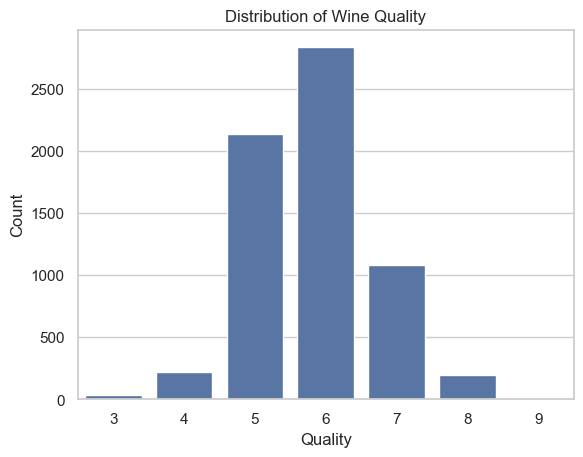

In [36]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.countplot(data=df, x='quality')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [37]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6497 non-null   float64 
 1   volatile_acidity      6497 non-null   float64 
 2   citric_acid           6497 non-null   float64 
 3   residual_sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free_sulfur_dioxide   6497 non-null   float64 
 6   total_sulfur_dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   category
dtypes: category(1), float64(11)
memory usage: 565.2 KB


In [39]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
# Import data_review script
from data_review import get_statistics

# Descriptive statistics about numeric data
get_statistics(df)

-------------------------
Descriptive Statistics
-------------------------
          fixed_acidity  volatile_acidity  citric_acid  residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density           pH    sulphates      alcohol
count       6497.000000       6497.000000  6497.000000     6497.000000  6497.000000          6497.000000           6497.000000  6497.000000  6497.000000  6497.000000  6497.000000
mean           7.215307          0.339666     0.318633        5.443235     0.056034            30.525319            115.744574     0.994697     3.218501     0.531268    10.491801
std            1.296434          0.164636     0.145318        4.757804     0.035034            17.749400             56.521855     0.002999     0.160787     0.148806     1.192712
min            3.800000          0.080000     0.000000        0.600000     0.009000             1.000000              6.000000     0.987110     2.720000     0.220000     8.000000
25%            6.400000       

In [41]:
# Import data_cleaning and EDA scripts

import seaborn as sns
import eda

sns.set_theme(style='whitegrid')

In [42]:
def categorize_quality(value):
    if 0<= value <= 3:
        return 0
    elif 4 <= value <= 6:
        return 1 
    else:
        return 2 

In [43]:
df['rating'] = df['quality'].apply(categorize_quality)
df['rating'] = df['rating'].astype('category')

df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2


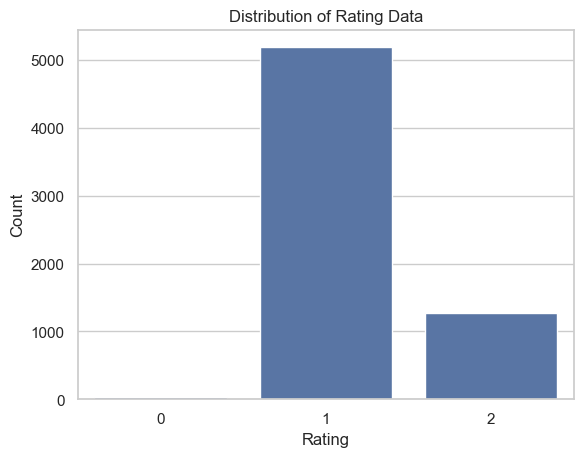

In [44]:
sns.countplot(data=df, x='rating')
plt.title('Distribution of Rating Data')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [45]:
df['rating'].value_counts()

rating
1    5190
2    1277
0      30
Name: count, dtype: int64

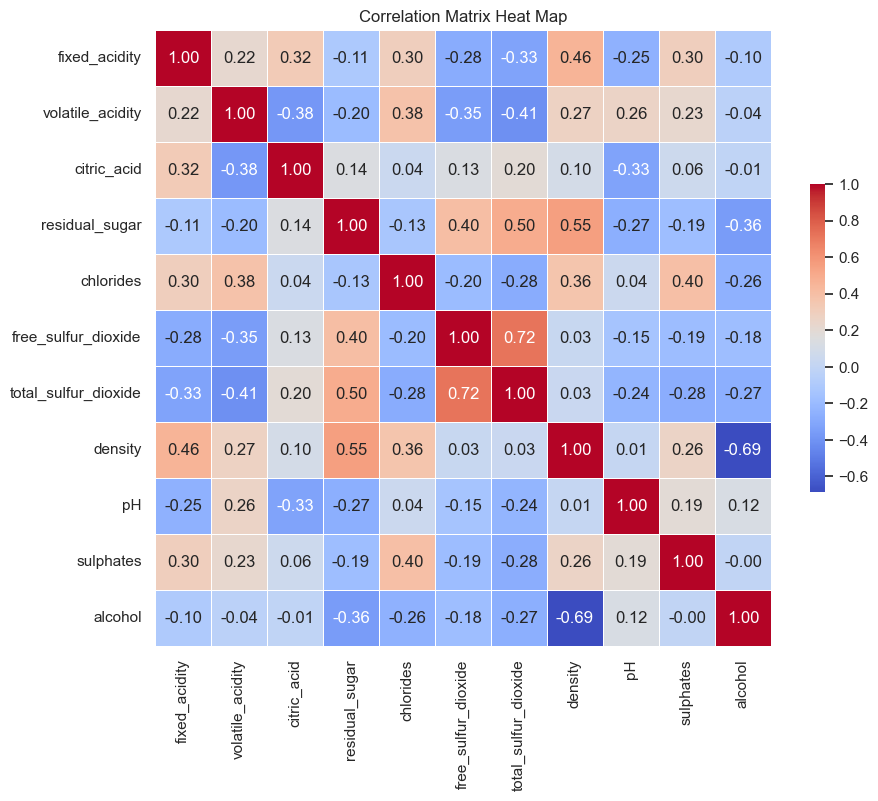

In [46]:
eda.gen_corr_matrix_hmap(df)

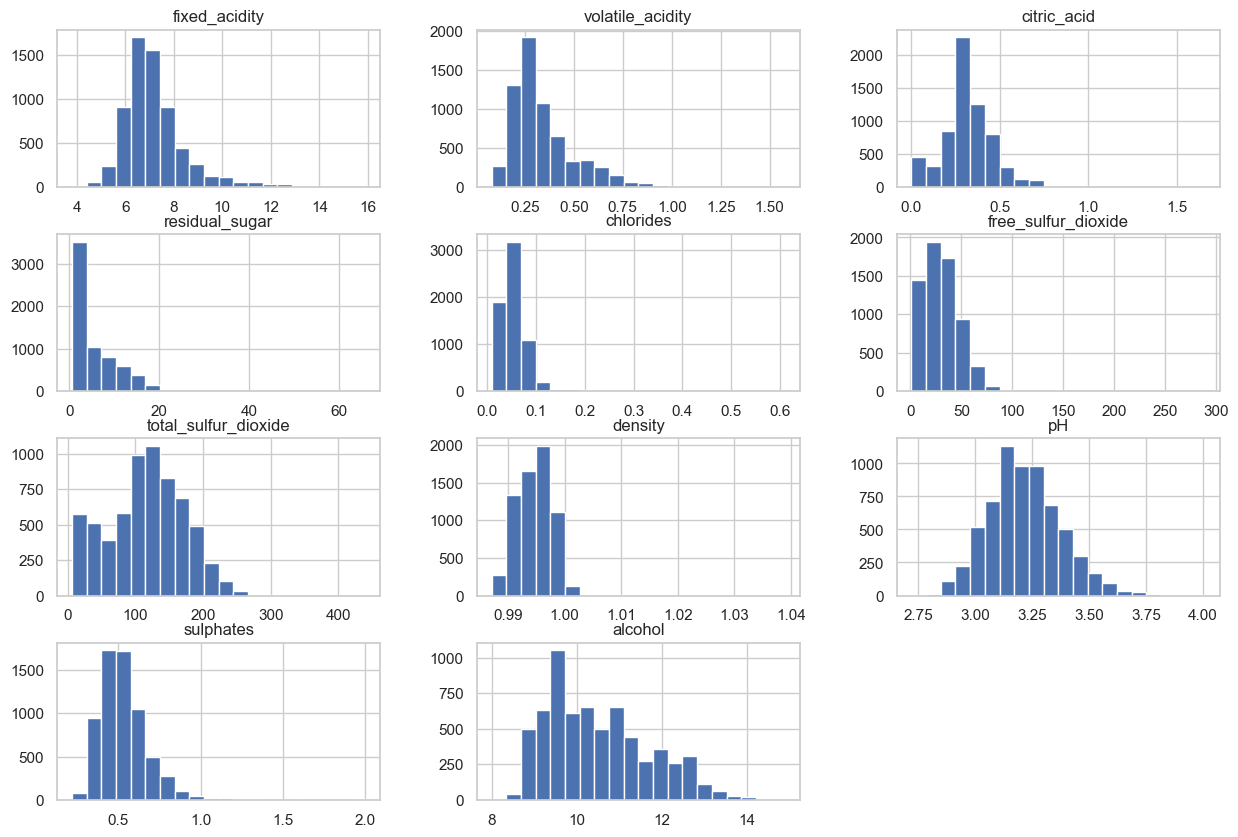

In [47]:
eda.gen_histograms(df)

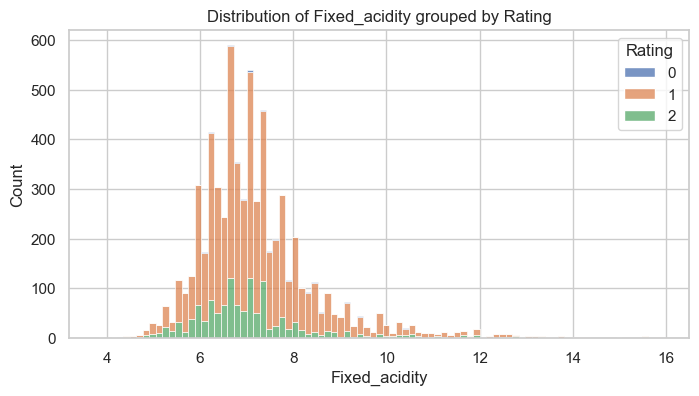

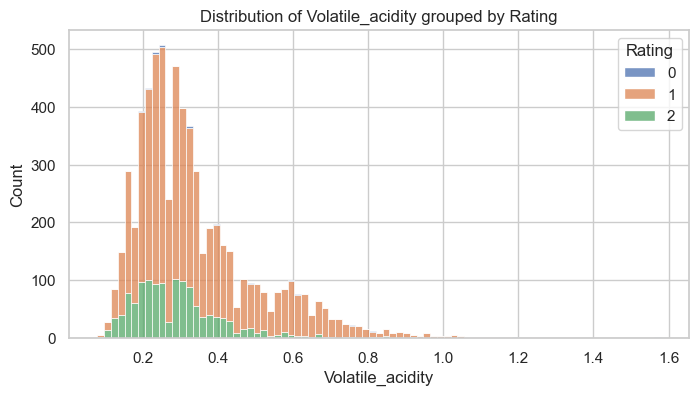

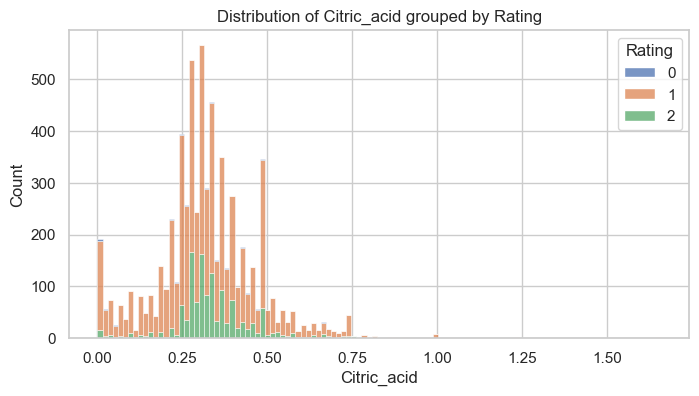

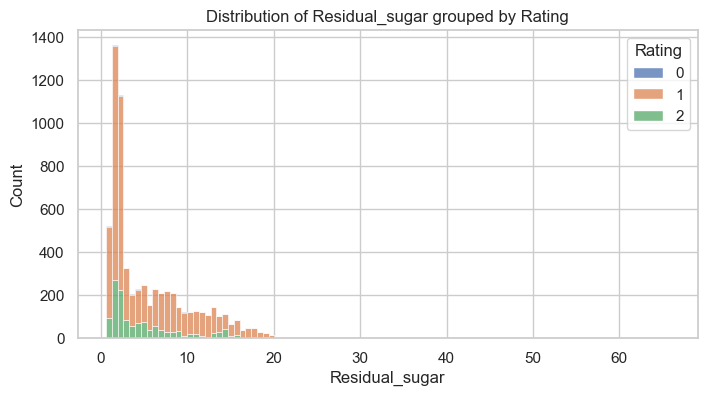

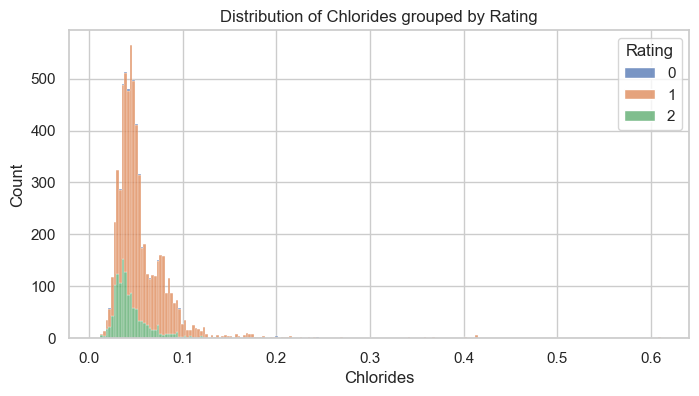

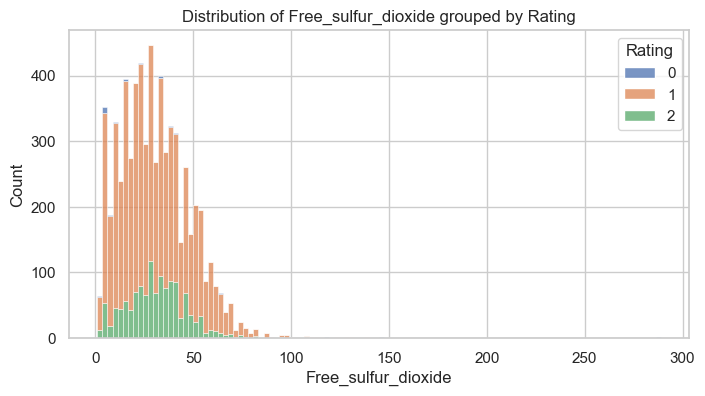

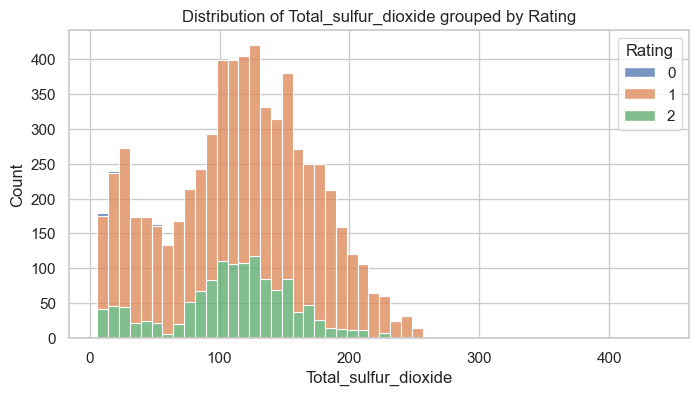

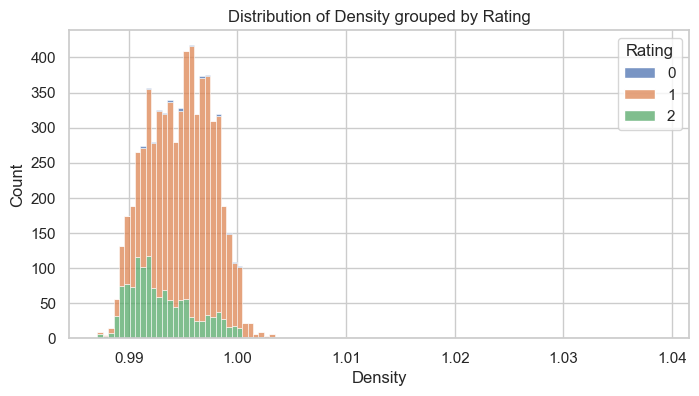

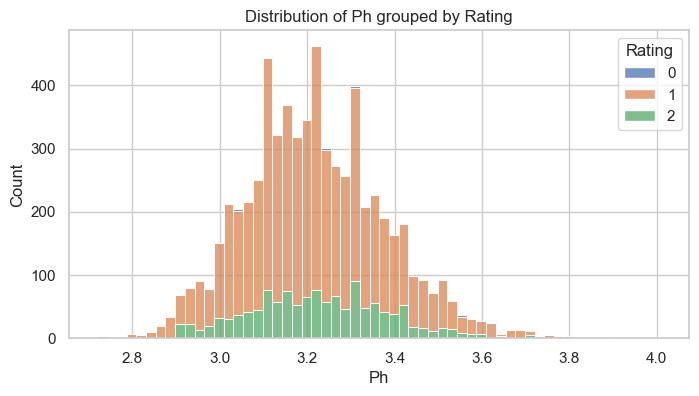

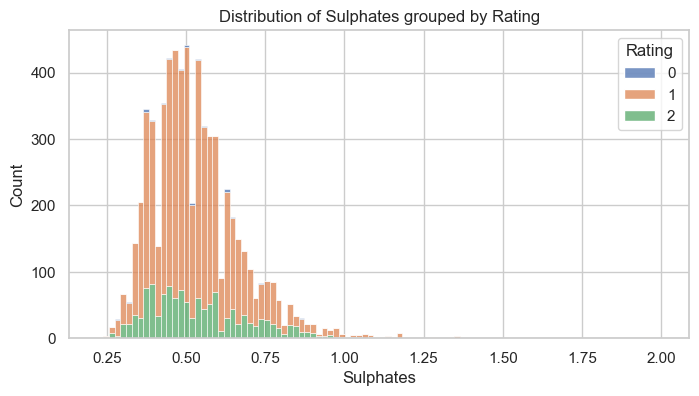

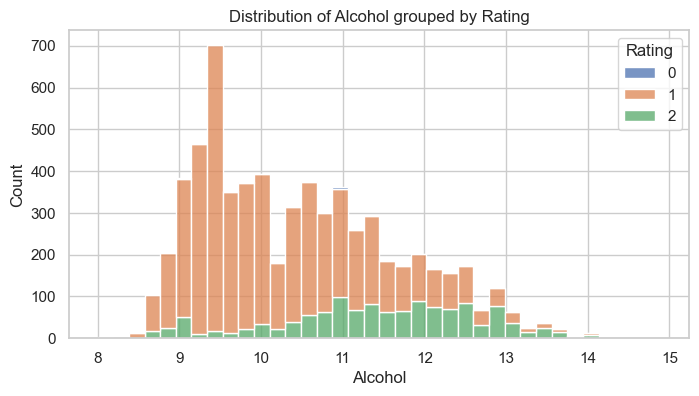

In [48]:
eda.gen_histograms_by_category(df, 'rating')

In [49]:
from data_review import get_statistics

get_statistics(df)

-------------------------
Descriptive Statistics
-------------------------
          fixed_acidity  volatile_acidity  citric_acid  residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density           pH    sulphates      alcohol
count       6497.000000       6497.000000  6497.000000     6497.000000  6497.000000          6497.000000           6497.000000  6497.000000  6497.000000  6497.000000  6497.000000
mean           7.215307          0.339666     0.318633        5.443235     0.056034            30.525319            115.744574     0.994697     3.218501     0.531268    10.491801
std            1.296434          0.164636     0.145318        4.757804     0.035034            17.749400             56.521855     0.002999     0.160787     0.148806     1.192712
min            3.800000          0.080000     0.000000        0.600000     0.009000             1.000000              6.000000     0.987110     2.720000     0.220000     8.000000
25%            6.400000       

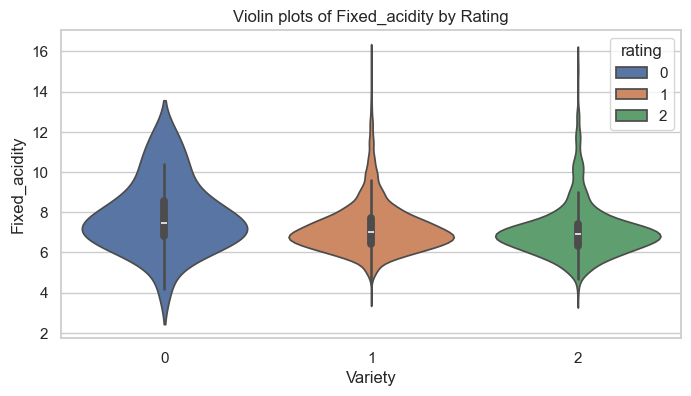

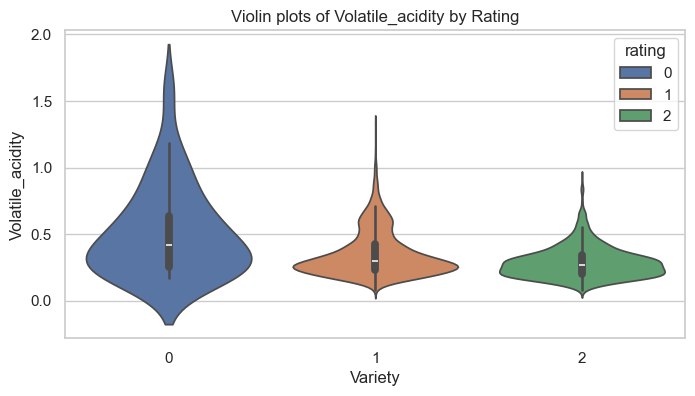

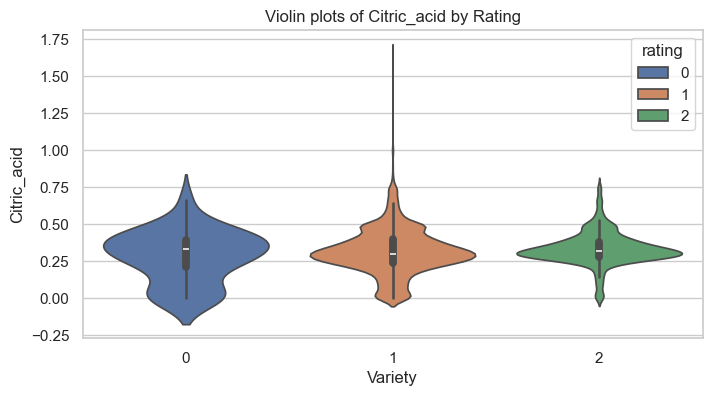

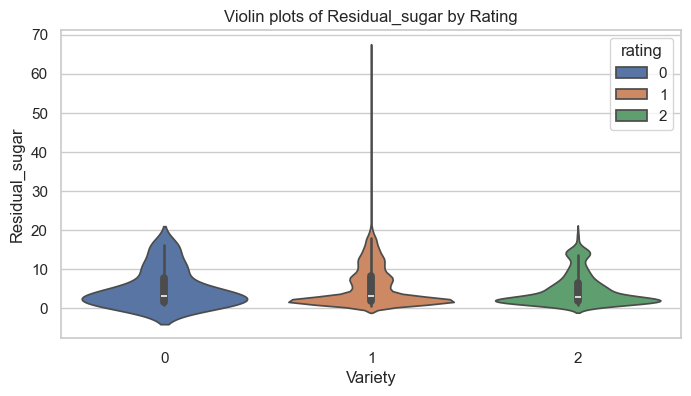

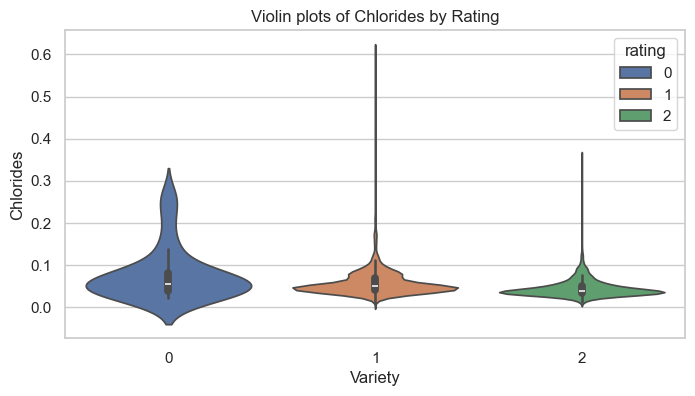

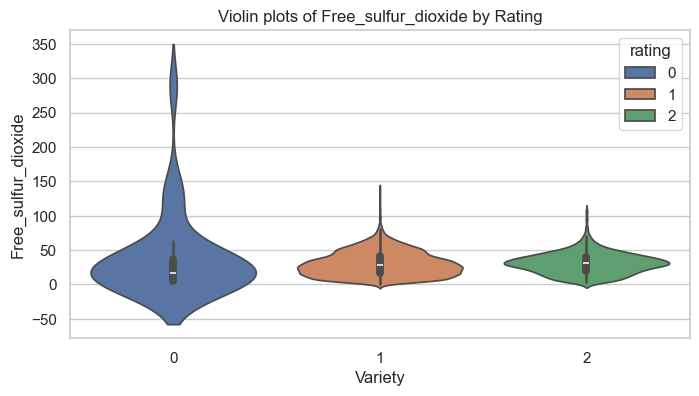

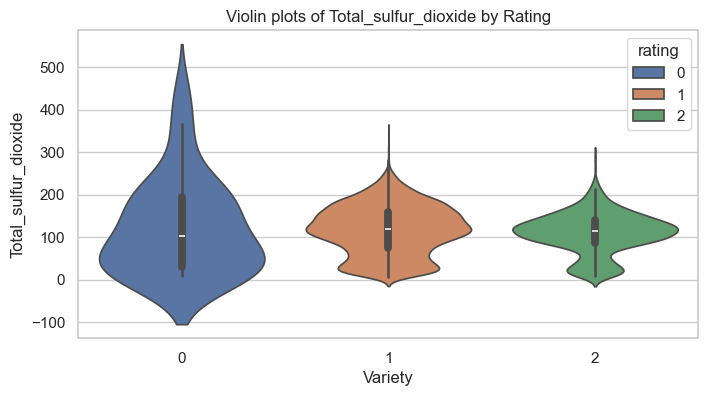

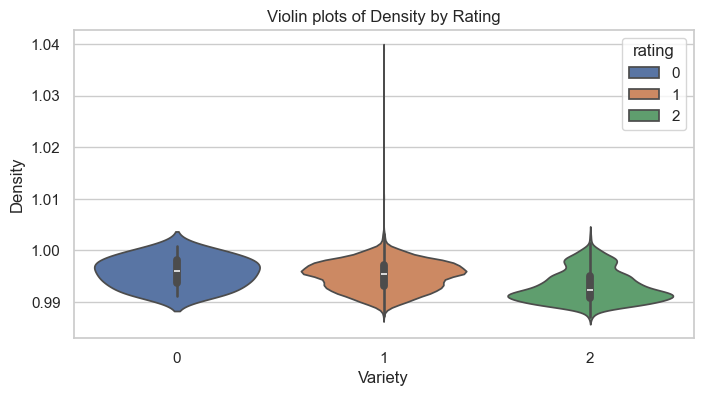

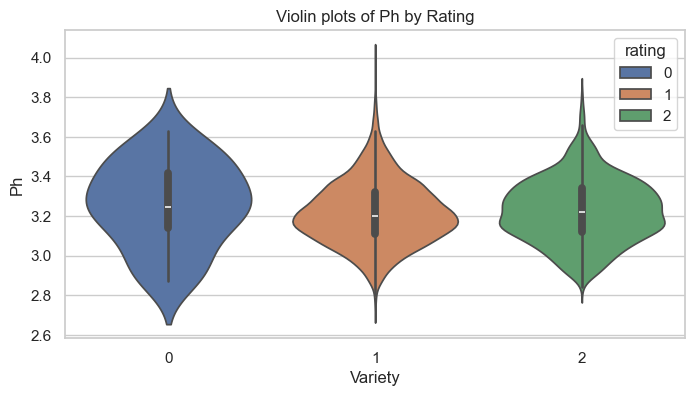

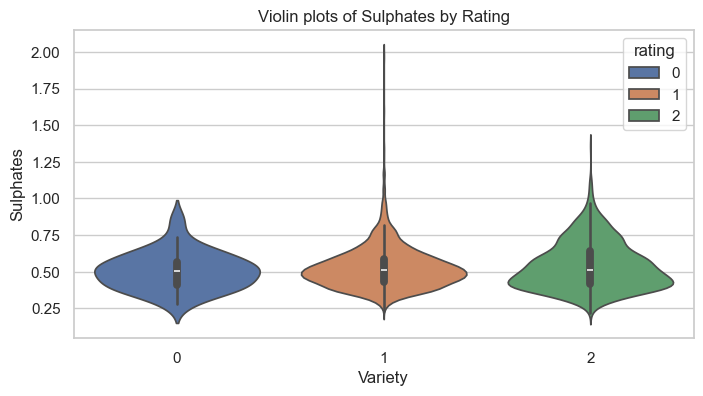

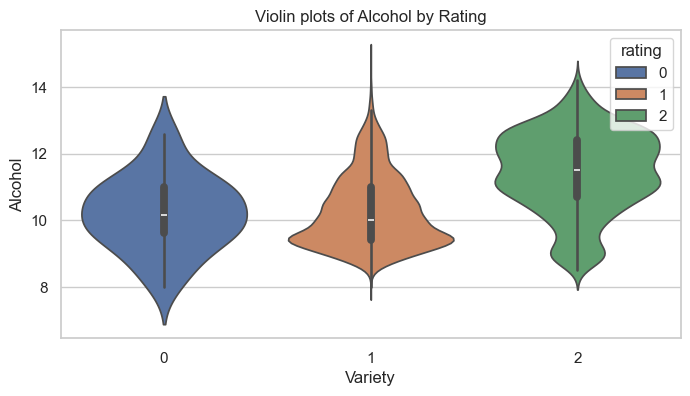

In [50]:
eda.gen_violin_by_category(df, 'rating')

In [51]:
from data_cleaning import scale_data, separate_data

df_scaled = scale_data(df)
df_encoded = pd.get_dummies(df_scaled, columns=['quality', 'rating'])

In [52]:
X, y = separate_data(df_encoded, 'alcohol')

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=0)

In [54]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

elastic_net_cv = ElasticNetCV(cv=5, random_state=1)
elastic_net_cv.fit(X_train, y_train)

print(f'Best Alpha: {elastic_net_cv.alpha_}')
print(f'Best L1 Ratio:{elastic_net_cv.l1_ratio_}')

Best Alpha: 0.0013637974514517563
Best L1 Ratio:0.5


In [58]:
from sklearn.metrics import mean_squared_error

elastic_net_pred = elastic_net_cv.predict(X_test)

mse = mean_squared_error(y_test, elastic_net_pred)
r_squared = elastic_net_cv.score(X_test, y_test)

print(f'Mean Squared Error: {mse}')
print(f'R-squared value: {r_squared}')

Mean Squared Error: 0.2999434011721803
R-squared value: 0.7142939720612289
